<a href="https://colab.research.google.com/github/Landryl/edh/blob/master/hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
def read_int(f):
    ba = bytearray(4)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.int32)
    return prm[0]
    
def read_double(f):
    ba = bytearray(8)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.double)
    return prm[0]

def read_double_tab(f, n):
    ba = bytearray(8*n)
    nr = f.readinto(ba)
    if nr != len(ba):
        return []
    else:
        prm = np.frombuffer(ba, dtype=np.double)
        return prm
    
def get_pics_from_file(filename):
    # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
    print("Ouverture du fichier de pics "+filename)
    f_pic = open(filename, "rb")
    info = dict()
    info["nb_pics"] = read_int(f_pic)
    print("Nb pics par trame: " + str(info["nb_pics"]))
    info["freq_sampling_khz"] = read_double(f_pic)
    print("Frequence d'echantillonnage: " + str(info["freq_sampling_khz"]) + " kHz")
    info["freq_trame_hz"] = read_double(f_pic)
    print("Frequence trame: " + str(info["freq_trame_hz"]) + " Hz")
    info["freq_pic_khz"] = read_double(f_pic)
    print("Frequence pic: " + str(info["freq_pic_khz"]) + " kHz")
    info["norm_fact"] = read_double(f_pic)
    print("Facteur de normalisation: " + str(info["norm_fact"]))
    tab_pics = []
    pics = read_double_tab(f_pic, info["nb_pics"])
    nb_trames = 1
    while len(pics) > 0:
        nb_trames = nb_trames+1
        tab_pics.append(pics)
        pics = read_double_tab(f_pic, info["nb_pics"])
    print("Nb trames: " + str(nb_trames))
    f_pic.close()
    return tab_pics, info


Ouverture du fichier de pics /content/data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802
Ouverture du fichier de pics /content/data/pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701


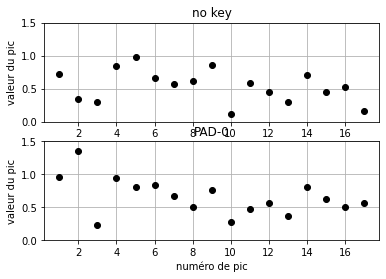

In [ ]:
pics_nokey, info = get_pics_from_file("/content/data/pics_NOKEY.bin")
pics_pad0, info = get_pics_from_file("/content/data/pics_0.bin")

######### Pics ############
# NO KEY
plt.figure(1)
plt.subplot(211)
plt.plot(range(1,info["nb_pics"]+1), pics_nokey[0], 'ko')
plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('no key')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')
# PAD-0
plt.subplot(212)
plt.plot(range(1,info["nb_pics"]+1), pics_pad0[0], 'ko')
plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('PAD-0')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')
#
plt.show()

In [ ]:
from os import listdir
from os.path import isfile, join, splitext

binpath = "/content/data/"
outPath = "/content/out_data/"
onlyfiles = [f for f in listdir(binpath) if isfile(join(binpath, f))]
for f in onlyfiles:
    print("Starting treatment of " + f)
    (pics, info) = get_pics_from_file(binpath + f)
    outfileName = outPath + splitext(f)[0] + ".csv"
    outfile = open(outfileName, "w+")
    for pic in pics:
        for p in range(len(pic) - 1):
            outfile.write(str(pic[p]) + ",")
        outfile.write(str(pic[len(pic) - 1]) + "\n")
    outfile.close()
    print("Done. Data stored in " + outfileName + "\n\n")


Starting treatment of pics_1.bin
Ouverture du fichier de pics /content/data/pics_1.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8390
Done. Data stored in /content/out_data/pics_1.csv


Starting treatment of pics_P.bin
Ouverture du fichier de pics /content/data/pics_P.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7840
Done. Data stored in /content/out_data/pics_P.csv


Starting treatment of pics_G.bin
Ouverture du fichier de pics /content/data/pics_G.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7720
Done. Data stored in /content/out_data/pics_G.csv


Starting treatment of pics_B.bin
Ouverture du fichier de pics /content/data/pics_B.bin
Nb pics par trame: 17


In [ ]:
import numpy
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from os import listdir
#load every data
keys = []
dataset_full = None
dataset_correspondences = None
for file_name in listdir('/content/out_data'):
  key = file_name[5:len(file_name) - 4]
  if (key != "LOGINMDP"):
    keys.append(key)
    print(keys)
    #new datas
    dataset = loadtxt('/content/out_data/' + file_name, delimiter=',')
    if (dataset_full is None):
      dataset_full = dataset
    else:
      dataset_full = numpy.concatenate((dataset_full, dataset))
    
    #correspondences
    zero_one = [0] * 42 #total nbs of keys
    zero_one[len(keys) - 1] = 1
    matrix_zero_one = numpy.array([zero_one] * len(dataset))
    if (dataset_correspondences is None):
      dataset_correspondences = matrix_zero_one
    else:
      dataset_correspondences = numpy.concatenate((dataset_correspondences, matrix_zero_one))
    print(dataset_correspondences)
    print(dataset_full)

['S']
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
[[0.43579102 0.39611816 0.29418945 ... 0.92468262 0.75134277 0.24169922]
 [0.46081543 0.82336426 0.56396484 ... 0.94482422 0.92102051 0.94482422]
 [0.43395996 0.32897949 0.2355957  ... 0.26672363 0.2746582  0.22338867]
 ...
 [0.67260742 0.38085938 0.2355957  ... 0.74829102 0.80627441 0.22277832]
 [0.5871582  0.58166504 0.42297363 ... 0.62133789 0.68725586 0.50476074]
 [0.57922363 0.40466309 0.17822266 ... 0.76599121 0.88439941 0.10925293]]
['S', 'SUPPR']
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[[0.43579102 0.39611816 0.29418945 ... 0.92468262 0.75134277 0.24169922]
 [0.46081543 0.82336426 0.56396484 ... 0.94482422 0.92102051 0.94482422]
 [0.43395996 0.32897949 0.2355957  ... 0.26672363 0.2746582  0.22338867]
 ...
 [0.68115234 1.42822266 0.44311523 ... 0.86303711 0.65612793 0.14709473

# New section

In [ ]:
#Keral model
#model = Sequential()
#model.add(Dense(12, input_dim=len(dataset_full[0]), activation='relu'))
#model.add(Dense(10 * len(dataset_full[0]), activation='relu'))
#model.add(Dense(10 * len(dataset_full[0]), activation='relu'))
#model.add(Dense(len(keys), activation='sigmoid'))
#Keras compile
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X, y = shuffle(dataset_full, dataset_correspondences)
X_train, X_test, y_train, y_test = train_test_split(dataset_full, dataset_correspondences, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02396483962361266
Mean Squared Error: 0.01243838266602402
Root Mean Squared Error: 0.11152749735389932


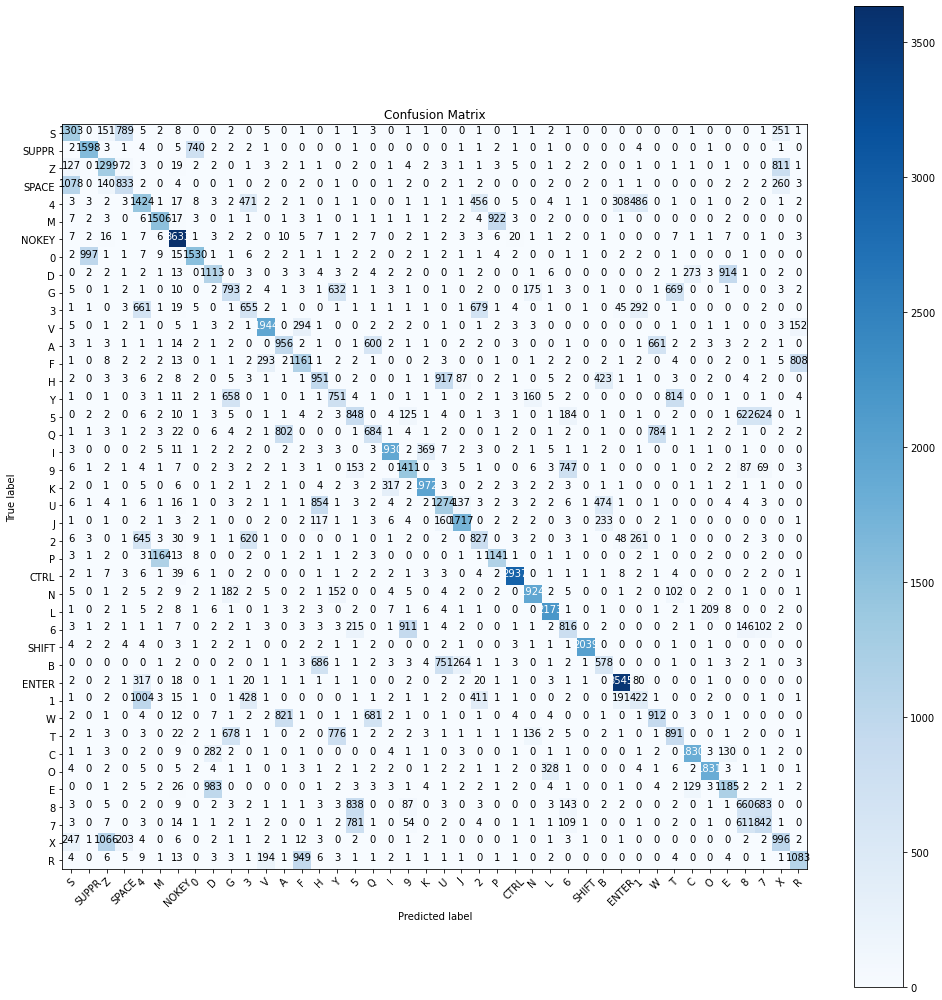

In [ ]:
# priting confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

rounded_y_test = np.argmax(y_test, axis=1)
rounded_y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(rounded_y_test, rounded_y_pred)

plt.figure(figsize=(14,14))
np.set_printoptions(precision=2)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(keys))
plt.xticks(tick_marks, keys, rotation=45)
plt.yticks(tick_marks, keys)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

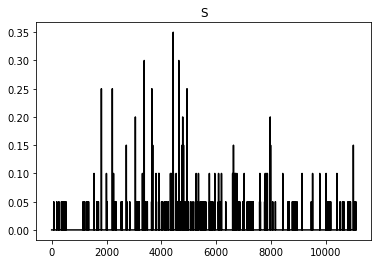

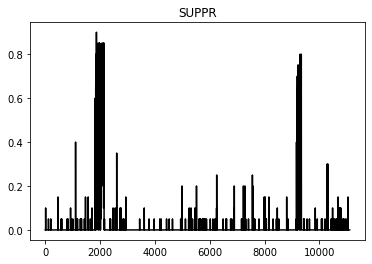

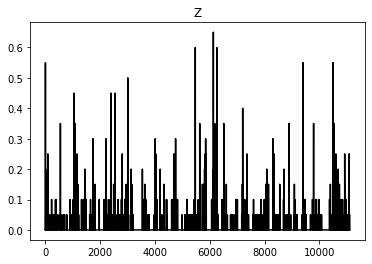

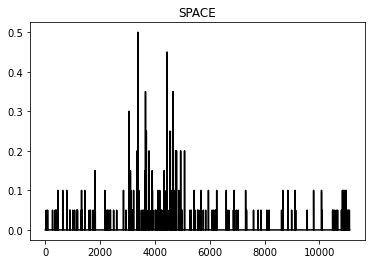

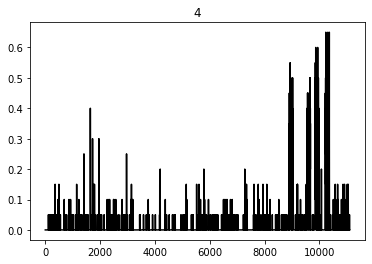

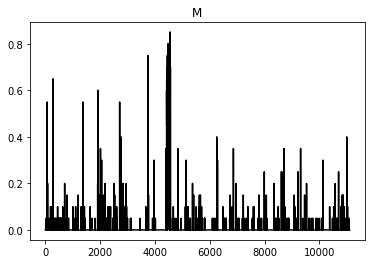

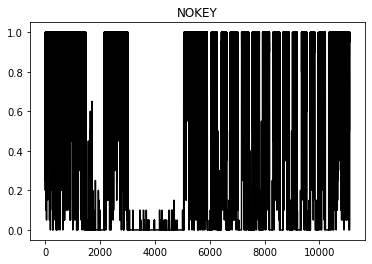

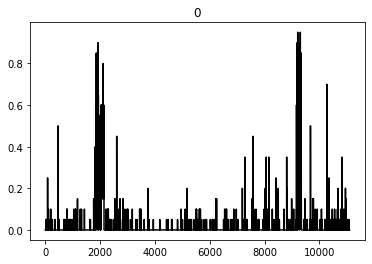

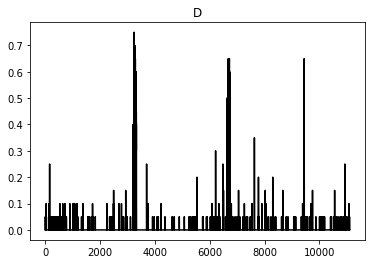

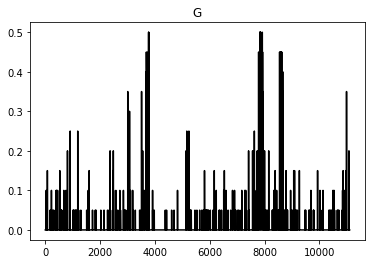

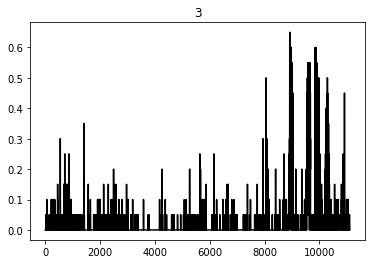

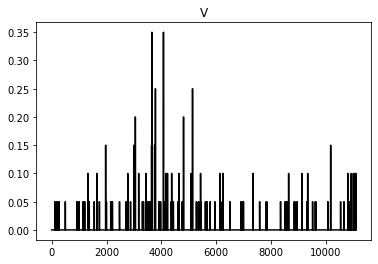

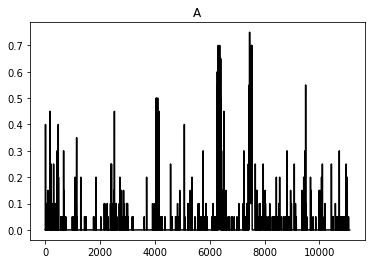

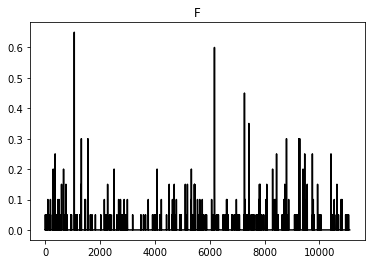

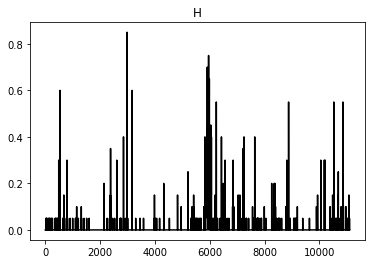

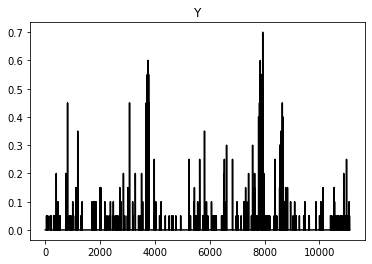

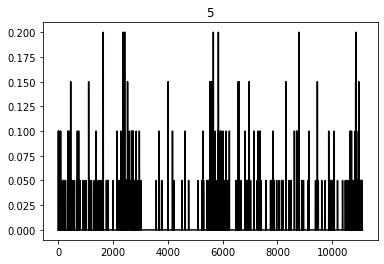

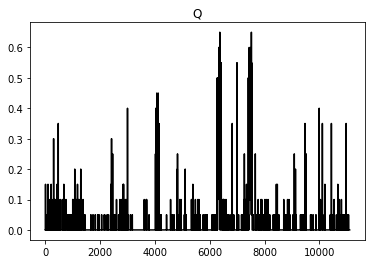

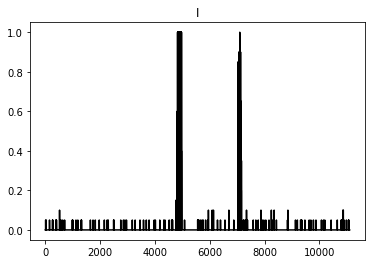

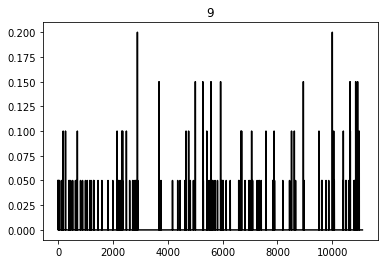

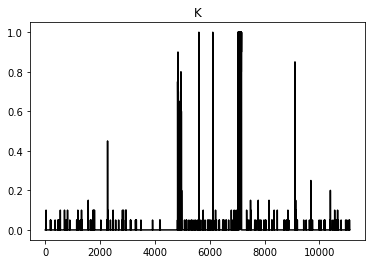

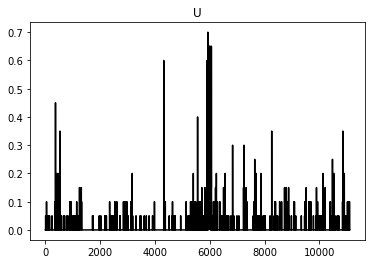

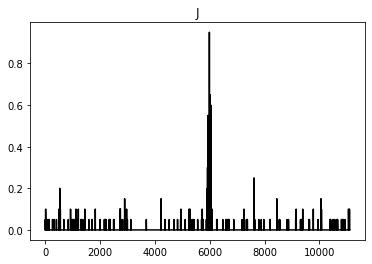

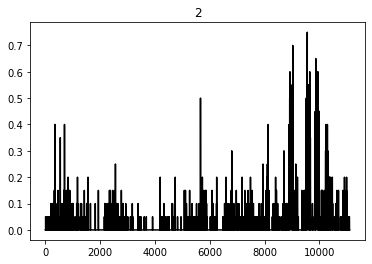

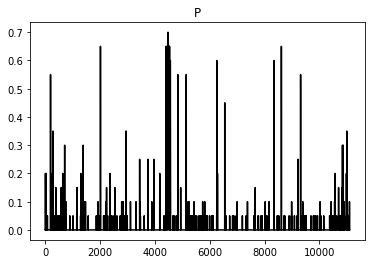

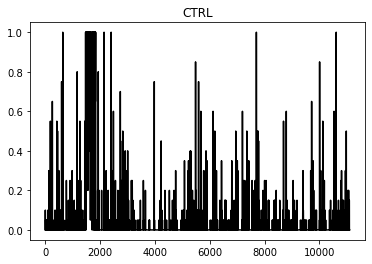

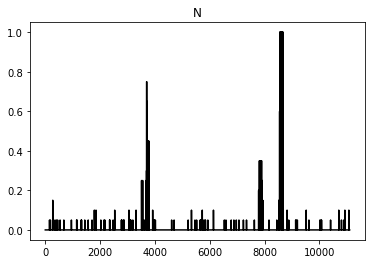

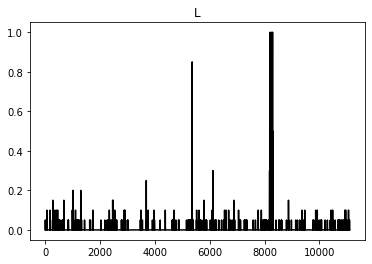

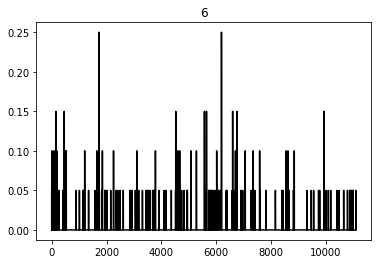

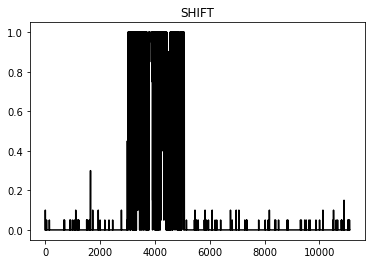

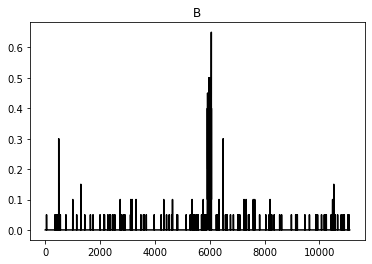

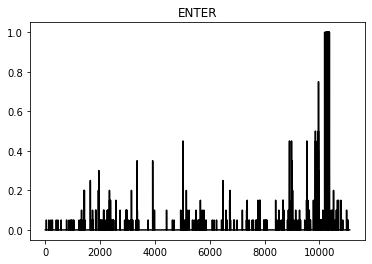

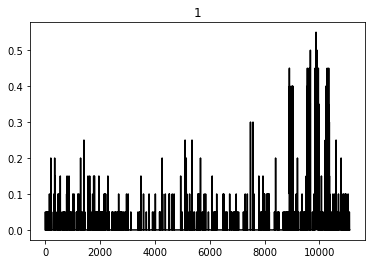

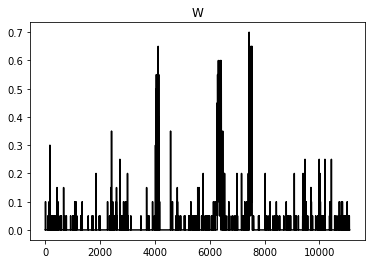

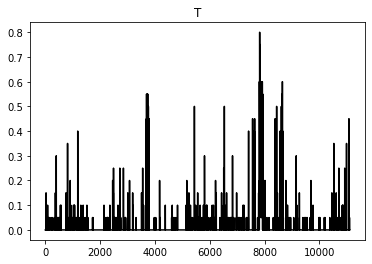

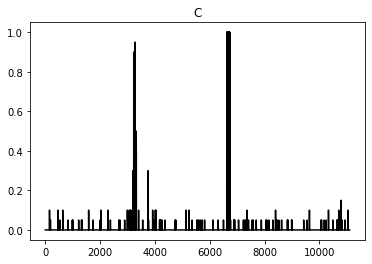

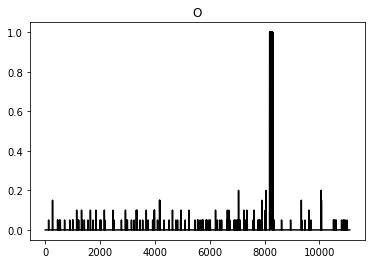

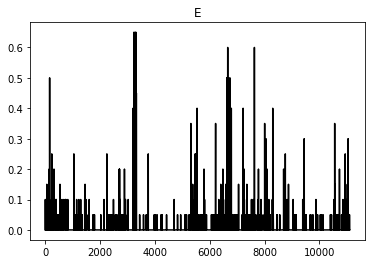

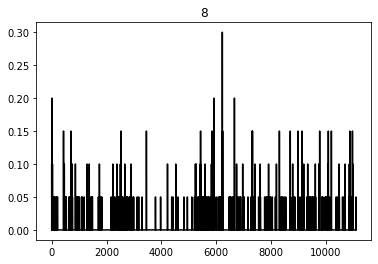

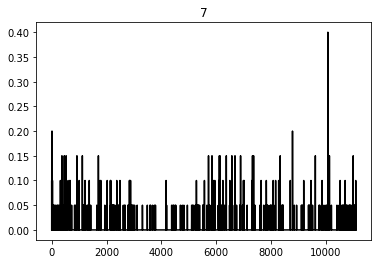

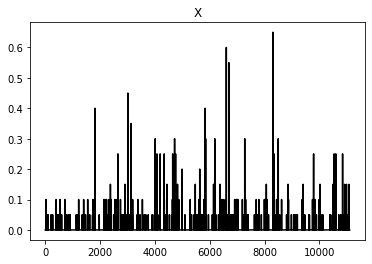

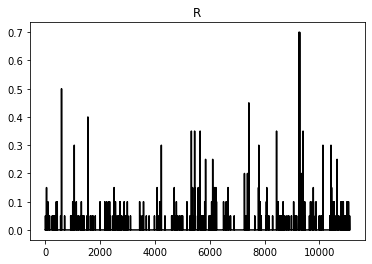

In [ ]:
dataset_loginmdp = loadtxt('/content/out_data/pics_LOGINMDP.csv', delimiter=',')
prediction = regressor.predict(dataset_loginmdp)

for i in range(42) :
  plt.figure(1)
  plt.title(keys[i])
  plt.plot(range(len(prediction[:,i])), prediction[:,i], 'k')
  plt.show()


In [ ]:
treshold = 0.5

password_probabilites = ['']

for n in range(len(prediction)):
  # NOKEY, d'après notre matrice de confusion, est fiable
  # On va donc filtrer les trames intéréssantes avec
  rounded_trame_prediction = np.argmax(prediction[n])
  if keys[rounded_trame_prediction] != "NOKEY":
    probable_key = ''
    for i in range(42):
      if keys[rounded_trame_prediction] == "SHIFT":
        continue
      if prediction[n][i] > treshold:
        probable_key = keys[i]
    if probable_key != '' and password_probabilites[-1] != probable_key:
      password_probabilites.append(probable_key)

print(password_probabilites)


prev = ''
for k in password_probabilites:
  if k != 'CTRL' and k != 'SUPPR' and k != 'SHIFT' and k != 'ENTER':
    if k != prev:
      print(k, end='')
      prev = k

# A F TE0TZE CEDECDCECDEDCDCEDEDE SPACE NGNYNYPTYNTNGT WAWAWA MPMPMPMPMPMPMPMPMPMPMPMPMPMPMPMPMPMPMPMPMPM IKIPIKIKIKIKIKIKIKI L K Z HUBHUJUBJUJBUBUHU K H WAWAWAWAWQAQWAQWQ P CDCECECDCDCDCDCDCDCDCDC KIKIKIKIKIKIKIKIKIKIKIKIK R WAWAWQWQAQAQWQWAWQW 0 TGTGYTGTGNTYTGTGTO LOLOLOLOLOLOLOLOLOLOLOLOLO PTNYNYN 12312323 K0R0R0M0 4324232434243424241 ZT

['', 'Z', 'M', 'CTRL', 'P', 'CTRL', 'M', 'CTRL', 'H', 'CTRL', 'F', 'CTRL', 'M', 'CTRL', 'SUPPR', 'CTRL', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'M', 'SUPPR', 'CTRL', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', 'P', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', 'CTRL', 'M', 'CTRL', 'H', 'C', 'E', 'D', 'E', 'D', 'C', 'D', 'C', 'D', 'E', 'D', 'E', 'D', 'E', 'C', 'D', 'E', 'D', 'E', 'D', 'E', 'T', 'N', 'Y', 'T', 'Y', 'M', 'Y', 'CTRL', 'W', 'U', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'P', 'M', 'I', 'K', 'I', 'K', 'I', 'P', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'K', 'I', 'P', 'L', 'Z', 'CTRL', 'K', 'CTRL', 'H', 'U', 'H', 'U', 'J', 'U', 'H', 'U', 'H', 'U', 'H', 'J', 'U', 'J', 'U', 'J', 'U', 'B